In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 1. 加载边列表数据
edge_file = "out.petster-hamster-friend"
G = nx.read_edgelist(edge_file, nodetype=int, comments="%")

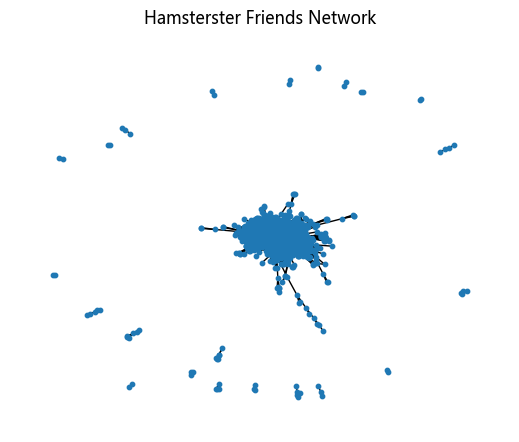

In [3]:
# 2. 绘制网络可视化图
plt.figure(figsize=(5, 4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=10)
plt.title("Hamsterster Friends Network")
plt.savefig("network.png") # 保存图形为PNG文件
plt.show()

In [4]:
# 3.找出介数中心性最高的20个节点

# 计算所有节点的介数中心性
betweenness_centralities = nx.betweenness_centrality(G)

# 按照介数中心性对节点进行排序
sorted_nodes = sorted(betweenness_centralities.items(), key=lambda x: x[1], reverse=True)

# 选择介数中心性最高的20个节点
top_20_nodes = sorted_nodes[:20]

# 打印结果
for node, centrality in top_20_nodes:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")


Node: 2539, Betweenness Centrality: 0.0795505758929833
Node: 563, Betweenness Centrality: 0.059613573577993274
Node: 646, Betweenness Centrality: 0.0533228509346257
Node: 2579, Betweenness Centrality: 0.03863041164165817
Node: 819, Betweenness Centrality: 0.035466794375009054
Node: 2419, Betweenness Centrality: 0.03277672954551918
Node: 1243, Betweenness Centrality: 0.02755783087230562
Node: 65, Betweenness Centrality: 0.02684091295814566
Node: 2176, Betweenness Centrality: 0.02657300119877968
Node: 277, Betweenness Centrality: 0.02601471538748622
Node: 30, Betweenness Centrality: 0.02225865535928285
Node: 1016, Betweenness Centrality: 0.02206710560307024
Node: 287, Betweenness Centrality: 0.021656833473438847
Node: 1055, Betweenness Centrality: 0.01953149729569776
Node: 2468, Betweenness Centrality: 0.018087198020861468
Node: 2786, Betweenness Centrality: 0.018025397899915672
Node: 280, Betweenness Centrality: 0.01800819372107515
Node: 450, Betweenness Centrality: 0.017978632487067252

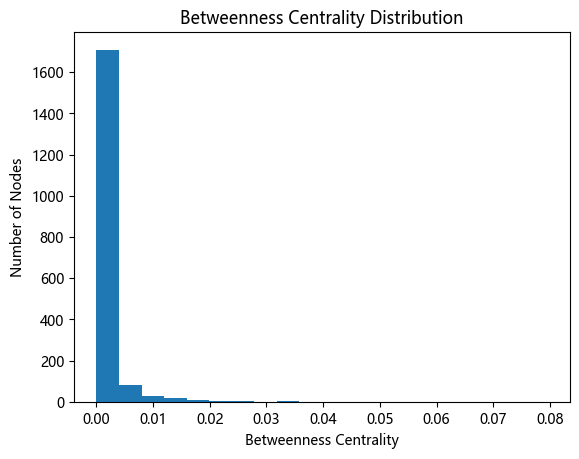

In [5]:
# 根据介数中心性的直方图分布大胆删去小于0.03的节点

import matplotlib.pyplot as plt

# 获取所有节点的介数中心性值
centrality_values = list(betweenness_centralities.values())

# 创建一个新的图形
plt.figure()

# 绘制直方图
plt.hist(centrality_values, bins=20)

# 设置标题和标签
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of Nodes')

# 显示图形
plt.show()


In [6]:
# 创建一个新的列表来存储介数中心性大于0.03的节点

filtered_nodes = [node for node, centrality in top_20_nodes if centrality >= 0.03]

# 打印结果
for node in filtered_nodes:
    print(f"Node: {node}, Betweenness Centrality: {betweenness_centralities[node]}")


Node: 2539, Betweenness Centrality: 0.0795505758929833
Node: 563, Betweenness Centrality: 0.059613573577993274
Node: 646, Betweenness Centrality: 0.0533228509346257
Node: 2579, Betweenness Centrality: 0.03863041164165817
Node: 819, Betweenness Centrality: 0.035466794375009054
Node: 2419, Betweenness Centrality: 0.03277672954551918


In [7]:
# 4.网络约束系数

# 计算filtered_nodes中节点的网络约束系数
node_constraints = {node: nx.constraint(G, [node]) for node in filtered_nodes}

# 打印并筛选节点
for node, constraint in node_constraints.items():
    print(f"Node: {node}, Constraint: {constraint}")

Node: 2539, Constraint: {2539: 0.008421188386534616}
Node: 563, Constraint: {563: 0.011527156777532724}
Node: 646, Constraint: {646: 0.010331341492397941}
Node: 2579, Constraint: {2579: 0.009662744286228344}
Node: 819, Constraint: {819: 0.015935149962958365}
Node: 2419, Constraint: {2419: 0.010072827130814921}


In [8]:
#  6.计算PageRank值
pageranks = nx.pagerank(G)

# 打印并筛选节点
for node in filtered_nodes:
    pagerank = pageranks[node]
    print(f"Node: {node}, PageRank: {pagerank}")

Node: 2539, PageRank: 0.008589396194066406
Node: 563, PageRank: 0.004894631729785736
Node: 646, PageRank: 0.005840573934959895
Node: 2579, PageRank: 0.006642559402831097
Node: 819, PageRank: 0.003506621810491485
Node: 2419, PageRank: 0.005374728806705937


In [9]:
# 计算所有节点的PageRank值
pageranks = nx.pagerank(G)

# 按照PageRank值对节点进行排序
sorted_nodes = sorted(pageranks.items(), key=lambda x: x[1], reverse=True)

# 选择PageRank值最高的20个节点
top_20_nodes = sorted_nodes[:20]

# 打印结果
for node, pagerank in top_20_nodes:
    print(f"Node: {node}, PageRank: {pagerank}")


Node: 2539, PageRank: 0.008589396194066406
Node: 2579, PageRank: 0.006642559402831097
Node: 646, PageRank: 0.005840573934959895
Node: 2419, PageRank: 0.005374728806705937
Node: 563, PageRank: 0.004894631729785736
Node: 65, PageRank: 0.004542027360277951
Node: 2524, PageRank: 0.004434942787693681
Node: 2610, PageRank: 0.0039868784472852905
Node: 277, PageRank: 0.0039814797801454565
Node: 1016, PageRank: 0.0038788257533177444
Node: 2199, PageRank: 0.0038459643485952645
Node: 2208, PageRank: 0.0037576759787791383
Node: 2611, PageRank: 0.003552690833824365
Node: 2187, PageRank: 0.0035402760925311466
Node: 819, PageRank: 0.003506621810491485
Node: 2176, PageRank: 0.003438105862603015
Node: 280, PageRank: 0.003403881660799452
Node: 2476, PageRank: 0.003393957833302244
Node: 2786, PageRank: 0.0033415521173764235
Node: 2219, PageRank: 0.003226135666694363


In [10]:
# 7. 计算局部聚类系数

# 计算filtered_nodes中节点的局部聚类系数
local_clustering_coefficients = nx.clustering(G, nodes=filtered_nodes)

# 打印结果
for node, coeff in local_clustering_coefficients.items():
    print(f"Node: {node}, Local Clustering Coefficient: {coeff}")


Node: 2539, Local Clustering Coefficient: 0.05727696982852182
Node: 563, Local Clustering Coefficient: 0.06600478029049457
Node: 646, Local Clustering Coefficient: 0.024787997390737115
Node: 2579, Local Clustering Coefficient: 0.06628347804818394
Node: 819, Local Clustering Coefficient: 0.04143277198609997
Node: 2419, Local Clustering Coefficient: 0.045787545787545784


In [15]:
# 9. 移除桥接节点，看看它对网络结构有什么影响

for node in filtered_nodes:
    G_copy = G.copy()
    # 移除桥接节点
    G_copy.remove_node(node)
    # 检查网络是否仍然连通
    is_connected = nx.is_connected(G_copy)
    print(f"Removing node {node}, is the graph still connected? {is_connected}")

Removing node 2539, is the graph still connected? False
Removing node 563, is the graph still connected? False
Removing node 646, is the graph still connected? False
Removing node 2579, is the graph still connected? False
Removing node 819, is the graph still connected? False
Removing node 2419, is the graph still connected? False


In [16]:
# 10.计算度中心性

# 计算节点的度中心性
bridge_nodes_degree_centrality = {node: G.degree(node) / (len(G) - 1) for node in filtered_nodes}

# 打印节点的度中心性
print("Degree Centrality:")
for node, degree_centrality in bridge_nodes_degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {degree_centrality}")

Degree Centrality:
Node 2539: Degree Centrality = 0.1464728056004308
Node 563: Degree Centrality = 0.07969843834141088
Node 646: Degree Centrality = 0.0791599353796446
Node 2579: Degree Centrality = 0.11954765751211632
Node 819: Degree Centrality = 0.046849757673667204
Node 2419: Degree Centrality = 0.09100700053850296


In [17]:
import networkx as nx
import community as community_louvain

# 使用Louvain算法检测社区
partition = community_louvain.best_partition(G)

# 计算每个社区的有效规模
community_effective_sizes = {}
for community in set(partition.values()):
    # 找出属于当前社区的节点
    community_nodes = [node for node, comm in partition.items() if comm == community]
    
    # 计算社区的实际大小（即社区内部的边的数量）
    actual_size = sum(G.degree(node) for node in community_nodes) / 2
    
    # 计算社区的潜在大小（即如果每对节点之间都有边，那么会有多少边）
    potential_size = len(community_nodes) * (len(community_nodes) - 1) / 2
    
    # 计算并存储社区的有效规模
    community_effective_sizes[community] = actual_size / potential_size if potential_size != 0 else 0

# 打印结果
for community, effective_size in community_effective_sizes.items():
    print(f"Community {community}: Effective Size = {effective_size}")


Community 0: Effective Size = 1.0
Community 1: Effective Size = 0.24312896405919662
Community 2: Effective Size = 0.08273788776577204
Community 3: Effective Size = 0.0703034262485482
Community 4: Effective Size = 0.0898838004101162
Community 5: Effective Size = 0.03654754937500546
Community 6: Effective Size = 0.04796858996244452
Community 7: Effective Size = 0.6666666666666666
Community 8: Effective Size = 0.6666666666666666
Community 9: Effective Size = 0.1436734693877551
Community 10: Effective Size = 1.0
Community 11: Effective Size = 0.04996936274509804
Community 12: Effective Size = 0.15214761040532365
Community 13: Effective Size = 1.0
Community 14: Effective Size = 1.0
Community 15: Effective Size = 1.0
Community 16: Effective Size = 0.4
Community 17: Effective Size = 1.0
Community 18: Effective Size = 1.1666666666666667
Community 19: Effective Size = 0.7666666666666667
Community 20: Effective Size = 0.5
Community 21: Effective Size = 0.6666666666666666
Community 22: Effective 

In [18]:
# 11.计算filtered_nodes中每个节点所在社区的有效规模

filtered_effective_sizes = {}
for node in filtered_nodes:
    community = partition[node]  # 找出节点所在的社区
    filtered_effective_sizes[node] = community_effective_sizes[community]

# 打印结果
print("Effective Size for Nodes in Filtered Nodes:")
for node, effective_size in filtered_effective_sizes.items():
    print(f"Node {node}: Effective Size = {effective_size}")


Effective Size for Nodes in Filtered Nodes:
Node 2539: Effective Size = 0.03654754937500546
Node 563: Effective Size = 0.08273788776577204
Node 646: Effective Size = 0.04996936274509804
Node 2579: Effective Size = 0.03654754937500546
Node 819: Effective Size = 0.04796858996244452
Node 2419: Effective Size = 0.0703034262485482


In [19]:
# 计算filtered_nodes中每个节点的等级度
filtered_hierarchy = {}
for node in filtered_nodes:
    neighbors = set(G.neighbors(node))  # 找出节点的所有邻居
    if len(neighbors) > 1:  # 如果节点有多于一个的邻居
        connected_neighbors = sum(1 for i in neighbors for j in neighbors if i != j and G.has_edge(i, j))  # 计算邻居之间的连接数
        filtered_hierarchy[node] = connected_neighbors / (len(neighbors) * (len(neighbors) - 1))  # 计算等级度
    else:
        filtered_hierarchy[node] = 0  # 如果节点只有一个或没有邻居，那么它的等级度为0

# 打印结果
for node, hier in filtered_hierarchy.items():
    print(f"Node {node}: Hierarchy = {hier}")


Node 2539: Hierarchy = 0.05727696982852182
Node 563: Hierarchy = 0.06600478029049457
Node 646: Hierarchy = 0.024787997390737115
Node 2579: Hierarchy = 0.06628347804818394
Node 819: Hierarchy = 0.04143277198609997
Node 2419: Hierarchy = 0.045787545787545784


In [20]:
import pandas as pd

# 创建一个数据框来存储你的数据
df = pd.DataFrame({
    'Node': filtered_nodes,
    'Betweenness Centrality': [round(betweenness_centralities[node], 4) for node in filtered_nodes],
    'Constraint': [-round(node_constraints[node][node], 4) for node in filtered_nodes],  # 负相关的指标
    'PageRank': [round(pageranks[node], 4) for node in filtered_nodes],
    'Local Clustering Coefficient': [-round(local_clustering_coefficients[node], 4) for node in filtered_nodes],  # 负相关的指标
    'Degree Centrality': [round(bridge_nodes_degree_centrality[node], 4) for node in filtered_nodes],
    'Community Effective Size': [-round(filtered_effective_sizes[node], 4) for node in filtered_nodes],  # 负相关的指标
    'Hierarchy': [round(filtered_hierarchy[node], 4) for node in filtered_nodes]
})

# 设置Node列为索引
df.set_index('Node', inplace=True)

# 打印数据框
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df)


      Betweenness Centrality  Constraint  PageRank  \
Node                                                 
2539                  0.0796     -0.0084    0.0086   
563                   0.0596     -0.0115    0.0049   
646                   0.0533     -0.0103    0.0058   
2579                  0.0386     -0.0097    0.0066   
819                   0.0355     -0.0159    0.0035   
2419                  0.0328     -0.0101    0.0054   

      Local Clustering Coefficient  Degree Centrality  \
Node                                                    
2539                       -0.0573             0.1465   
563                        -0.0660             0.0797   
646                        -0.0248             0.0792   
2579                       -0.0663             0.1195   
819                        -0.0414             0.0468   
2419                       -0.0458             0.0910   

      Community Effective Size  Hierarchy  
Node                                       
2539                  

In [21]:
# 计算综合得分
df['Score'] = df.sum(axis=1)

# 打印分数列
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df['Score'])

Node
2539    0.1898
563     0.0500
646     0.0780
2579    0.1185
819     0.0219
2419    0.0488
Name: Score, dtype: float64


In [22]:
from IPython.display import display, HTML

# 生成HTML表格
html = df.to_html(classes='center')

# 添加CSS
html = html + """
<style>
.center {
    text-align: center;
}
</style>
"""

display(HTML(html))


,Betweenness Centrality,Constraint,PageRank,Local Clustering Coefficient,Degree Centrality,Community Effective Size,Hierarchy,Score
Node,,,,,,,,
2539,0.0796,-0.0084,0.0086,-0.0573,0.1465,-0.0365,0.0573,0.1898
563,0.0596,-0.0115,0.0049,-0.0660,0.0797,-0.0827,0.0660,0.0500
646,0.0533,-0.0103,0.0058,-0.0248,0.0792,-0.0500,0.0248,0.0780
2579,0.0386,-0.0097,0.0066,-0.0663,0.1195,-0.0365,0.0663,0.1185
819,0.0355,-0.0159,0.0035,-0.0414,0.0468,-0.0480,0.0414,0.0219
2419,0.0328,-0.0101,0.0054,-0.0458,0.0910,-0.0703,0.0458,0.0488


In [23]:
# 新增：数据集概况

# 获取数据集概况
total_nodes = len(G.nodes())  # 总节点数
total_communities = len(set(partition.values()))  # 总社区数
total_edges = len(G.edges())  # 总连接数

# 打印数据集概况
print(f"总节点数: {total_nodes}")
print(f"总社区数: {total_communities}")
print(f"总连接数: {total_edges}")

总节点数: 1858
总社区数: 36
总连接数: 12534


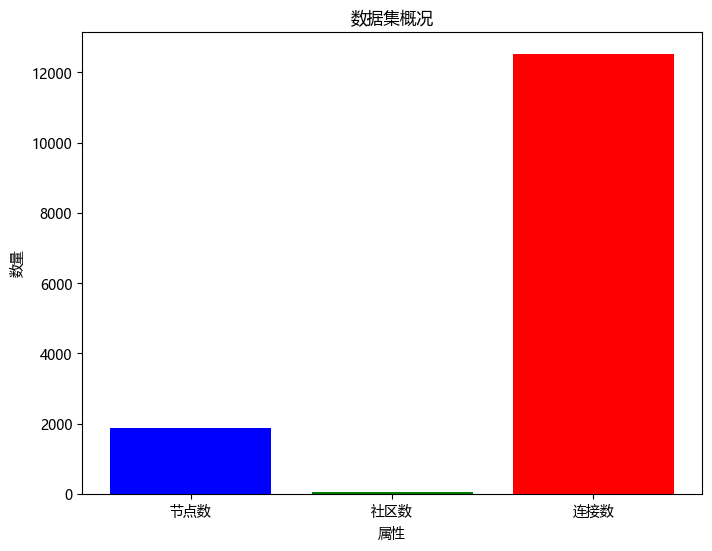

In [24]:
# 可视化数据集概况
plt.figure(figsize=(8, 6))
plt.bar(["节点数", "社区数", "连接数"], [total_nodes, total_communities, total_edges], color=["blue", "green", "red"])
plt.xlabel("属性")
plt.ylabel("数量")
plt.title("数据集概况")
plt.show()